In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
color_map = plt.get_cmap('tab20')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('e3dc_data.csv', sep=';',index_col = 'timestamp')#, header=None)
df

,Unnamed: 0,Jahr,Minute,Stunde,Wochentag,Woche,Monat,Ladezustand,Batterie (Laden),Batterie (Entladen),...,Solarproduktion Tracker 1,Solarproduktion Tracker 2,Solarproduktion Tracker 3,Solarproduktion,Hausverbrauch,Wallbox (ID 0) Gesamtladeleistung,Wallbox (ID 0) Netzbezug,Wallbox (ID 0) Solarladeleistung,Wallbox Gesamtladeleistung,Σ Verbrauch
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0,2022,0,0,5,52,1,5,0,0,...,0,0,NaN,NaN,161,NaN,NaN,NaN,NaN,161
2022-01-01 00:15:00,1,2022,15,0,5,52,1,5,0,0,...,0,0,NaN,NaN,177,NaN,NaN,NaN,NaN,177
2022-01-01 00:30:00,2,2022,30,0,5,52,1,5,0,0,...,0,0,NaN,NaN,193,NaN,NaN,NaN,NaN,193
2022-01-01 00:45:00,3,2022,45,0,5,52,1,5,0,0,...,0,0,NaN,NaN,178,NaN,NaN,NaN,NaN,178
2022-01-01 01:00:00,4,2022,0,1,5,52,1,5,0,0,...,0,0,NaN,NaN,179,NaN,NaN,NaN,NaN,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-21 16:45:00,42691,2023,45,16,1,12,3,100,0,0,...,518,0,"0,0","518,0",102,"0,0","0,0","0,0","0,0",102
2023-03-21 17:00:00,42692,2023,0,17,1,12,3,100,0,0,...,468,0,"0,0","468,0",104,"0,0","0,0","0,0","0,0",104
2023-03-21 17:15:00,42693,2023,15,17,1,12,3,100,0,0,...,296,0,"0,0","296,0",92,"0,0","0,0","0,0","0,0",92


In [3]:
# setting index
df.index = pd.to_datetime(df.index)

# data for 2022 and 2023
data_2022 = df.loc[df.index.year == 2022]
data_2023 = df.loc[df.index.year == 2023]

# monthly data 2022
df_januar = data_2022.loc[data_2022.index.month == 1]
df_february = data_2022.loc[data_2022.index.month == 2]
df_march = data_2022.loc[data_2022.index.month == 3]
df_april = data_2022.loc[data_2022.index.month == 4]
df_mai = data_2022.loc[data_2022.index.month == 5]
df_juni = data_2022.loc[data_2022.index.month == 6]
df_juli = data_2022.loc[data_2022.index.month == 7]
df_august = data_2022.loc[data_2022.index.month == 8]
df_september = data_2022.loc[data_2022.index.month == 9]
df_october = data_2022.loc[data_2022.index.month == 10]
df_november = data_2022.loc[data_2022.index.month == 11]
df_dezember = data_2022.loc[data_2022.index.month == 12]

month_dict_2022 = {}
month_dict_2022['januar'] = df_januar
month_dict_2022['february'] = df_february
month_dict_2022['march'] = df_march
month_dict_2022['april'] = df_april
month_dict_2022['mai'] = df_mai
month_dict_2022['juni'] = df_juni
month_dict_2022['july'] = df_juli
month_dict_2022['august'] = df_august
month_dict_2022['september'] = df_september
month_dict_2022['october'] = df_october
month_dict_2022['november'] = df_november
month_dict_2022['december'] = df_dezember

# monthly data 2023
df_januar23 = data_2023.loc[data_2023.index.month == 1]
df_february23 = data_2023.loc[data_2023.index.month == 2]
df_march23 = data_2023.loc[data_2023.index.month == 3]

month_dict_2023 = {}
month_dict_2023['januar'] = df_januar23
month_dict_2023['february'] = df_february23
month_dict_2023['march'] = df_march23

In [4]:
# function to plot a day
def plots_for_days(dataframe_month, day_of_month):
    day_data = dataframe_month.loc[dataframe_month.index.day == day_of_month]
    
    return day_data 

In [5]:
# call function and set index
day_data = plots_for_days(month_dict_2023['januar'], day_of_month=2)
day_data.index = day_data.index.time

day_data

,Unnamed: 0,Jahr,Minute,Stunde,Wochentag,Woche,Monat,Ladezustand,Batterie (Laden),Batterie (Entladen),...,Solarproduktion Tracker 1,Solarproduktion Tracker 2,Solarproduktion Tracker 3,Solarproduktion,Hausverbrauch,Wallbox (ID 0) Gesamtladeleistung,Wallbox (ID 0) Netzbezug,Wallbox (ID 0) Solarladeleistung,Wallbox Gesamtladeleistung,Σ Verbrauch
00:00:00,35136,2023,0,0,0,1,1,97,0,0,...,0,0,NaN,NaN,135,"0,0","0,0","0,0","0,0",135
00:15:00,35137,2023,15,0,0,1,1,97,0,0,...,0,0,NaN,NaN,281,"0,0","0,0","0,0","0,0",281
00:30:00,35138,2023,30,0,0,1,1,97,0,0,...,0,0,NaN,NaN,513,"0,0","0,0","0,0","0,0",513
00:45:00,35139,2023,45,0,0,1,1,97,0,0,...,0,0,NaN,NaN,104,"0,0","0,0","0,0","0,0",104
01:00:00,35140,2023,0,1,0,1,1,97,0,0,...,0,0,NaN,NaN,338,"0,0","0,0","0,0","0,0",338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,35227,2023,45,22,0,1,1,40,0,0,...,0,0,NaN,NaN,278,"0,0","0,0","0,0","0,0",278
23:00:00,35228,2023,0,23,0,1,1,40,0,0,...,0,0,NaN,NaN,262,"0,0","0,0","0,0","0,0",262
23:15:00,35229,2023,15,23,0,1,1,40,0,0,...,0,0,NaN,NaN,307,"0,0","0,0","0,0","0,0",307
23:30:00,35230,2023,30,23,0,1,1,40,0,0,...,0,0,NaN,NaN,315,"0,0","0,0","0,0","0,0",315


[]

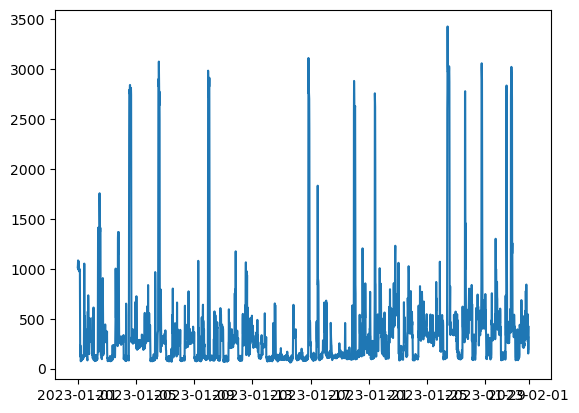

In [6]:
# days of month
days = df_januar23
numbers = np.arange(1,32)

# shape
month_dict_2023['januar'].shape

# plot january and march
data1 = month_dict_2023['januar']['Σ Verbrauch']
data2 = month_dict_2023['march']['Σ Verbrauch'][1]
test = data1.index

plt.plot(test,data1)
plt.plot()

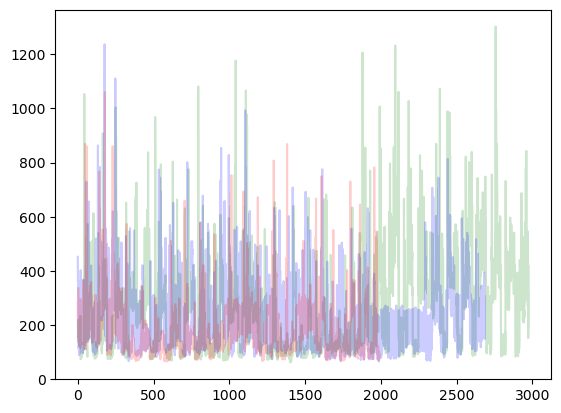

In [7]:
# plot data for 2023 in one graph (Hausverbrauch)
month_dict_2023['januar']['Hausverbrauch'].reset_index(drop=True).plot(alpha=0.2,color = 'green')
month_dict_2023['february']['Hausverbrauch'].reset_index(drop=True).plot(alpha=0.2,color = 'blue')
month_dict_2023['march']['Hausverbrauch'].reset_index(drop=True).plot(alpha=0.2,color = 'red')
plt.show()

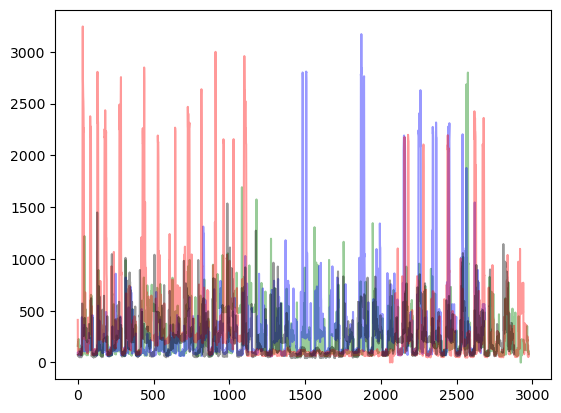

In [8]:
month_dict_2022['januar']['Hausverbrauch'].reset_index(drop=True).plot(alpha=0.4,color = 'green')
month_dict_2022['february']['Hausverbrauch'].reset_index(drop=True).plot(alpha=0.4,color = 'blue')
month_dict_2022['march']['Hausverbrauch'].reset_index(drop=True).plot(alpha=0.4,color = 'red')
month_dict_2022['april']['Hausverbrauch'].reset_index(drop=True).plot(alpha=0.4,color = 'black')

plt.show()

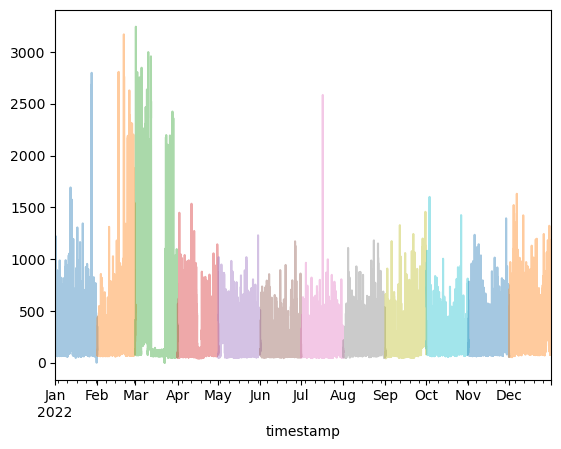

In [9]:
# plot all months 2022
for i in month_dict_2022.keys():
    month_dict_2022[i]['Hausverbrauch'].plot(alpha=0.4)
plt.show()

<Axes: xlabel='timestamp'>

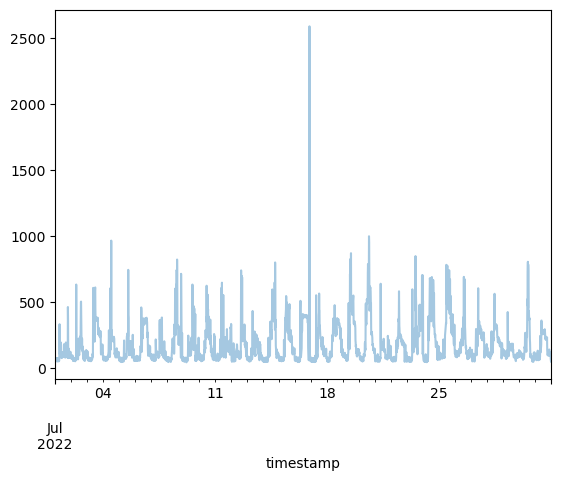

In [10]:
#plot only july 2022
month_dict_2022['july']['Hausverbrauch'].plot(alpha=0.4)

<Axes: xlabel='timestamp'>

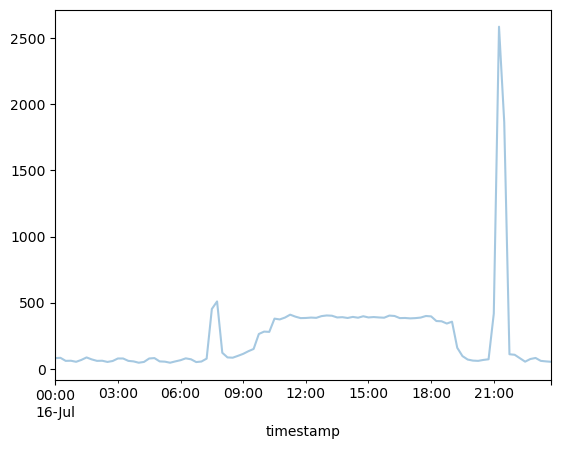

In [11]:
# plot one day (16. July 2022)
# Extract the data for July
july_data = month_dict_2022['july']

# Convert the index to a datetime type
july_data.index = pd.to_datetime(july_data.index)

# Filter the data for the day 16 July
filtered_data = july_data[july_data.index.date == pd.to_datetime('2022-07-16').date()]

# Plot the filtered data
filtered_data['Hausverbrauch'].plot(alpha=0.4)